In [ ]:
pip install catboost


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report


In [59]:
# 시스템에 설치된 한글 폰트 설정
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### Feature

In [60]:
feature = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/PRE데이터/features_except_GDP2.xlsx')
### 날짜 datatime 형식으로 변환
feature['날짜'] = pd.to_datetime(feature['날짜'])

### 피쳐 정보 확인
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   날짜                 117 non-null    datetime64[ns]
 1   경상수지               117 non-null    float64       
 2   실업률                117 non-null    float64       
 3   고용률                117 non-null    float64       
 4   WTI유가              117 non-null    float64       
 5   건설기성액(십억원)         117 non-null    float64       
 6   국내설비투자지수           117 non-null    float64       
 7   국내소매판매액지수          117 non-null    float64       
 8   국내전산업생산지수          117 non-null    float64       
 9   달러인덱스              117 non-null    float64       
 10  미국ISM(제조업물가지수)     117 non-null    float64       
 11  미국PMI(제조업구매담장자지수)  117 non-null    float64       
 12  미국건설지출             117 non-null    float64       
 13  미국취업자수증감(만명)       117 non-null    float64       
 14  미국생산자물가지수 

In [61]:
feature.tail()

,날짜,경상수지,실업률,고용률,WTI유가,건설기성액(십억원),국내설비투자지수,국내소매판매액지수,국내전산업생산지수,달러인덱스,...,미국건설지출,미국취업자수증감(만명),미국생산자물가지수,종합주택매매가격지수,소비자물가지수,소비자심리지수(CCSI),실업급여지급건수(월),전체임금총액(원),3년국채기준금리차,label
112,2022-08-01,-3.216346,-0.103448,0.0,-0.0920,-0.002917,0.069315,0.031369,-0.008050,0.027283,...,10.000000,-0.647826,-0.019616,-0.004939,-0.000920,0.032483,0.051012,-0.0555,-0.201858,1
113,2022-09-01,-1.453728,0.076923,0.0,-0.1123,-0.015550,-0.038602,-0.028571,-0.001803,0.031464,...,-0.636364,0.049383,0.001579,-0.006241,0.001749,0.029213,-0.051524,0.1034,0.491497,1
114,2022-10-01,-0.590460,0.000000,0.0,0.0886,0.019838,0.002273,0.014231,-0.006323,-0.005924,...,0.750000,0.415686,0.008492,-0.007546,0.003124,-0.028384,-0.101469,-0.1109,-0.025835,1
115,2022-11-01,-2.736097,-0.035714,0.0,-0.0690,0.004808,0.019652,-0.031805,0.008182,-0.049569,...,-1.285714,-0.285319,-0.004429,-0.013171,-0.000824,-0.026966,-0.012797,-0.0128,-0.386871,1
116,2022-12-01,-2.743049,0.111111,0.0,-0.0011,0.029782,-0.077094,0.004831,-0.008115,-0.024817,...,-2.500000,-0.472868,-0.030802,-0.016948,0.001742,0.040416,-0.059524,0.2368,-0.546609,1


In [62]:
feature['label'].value_counts()

label
0    60
1    57
Name: count, dtype: int64

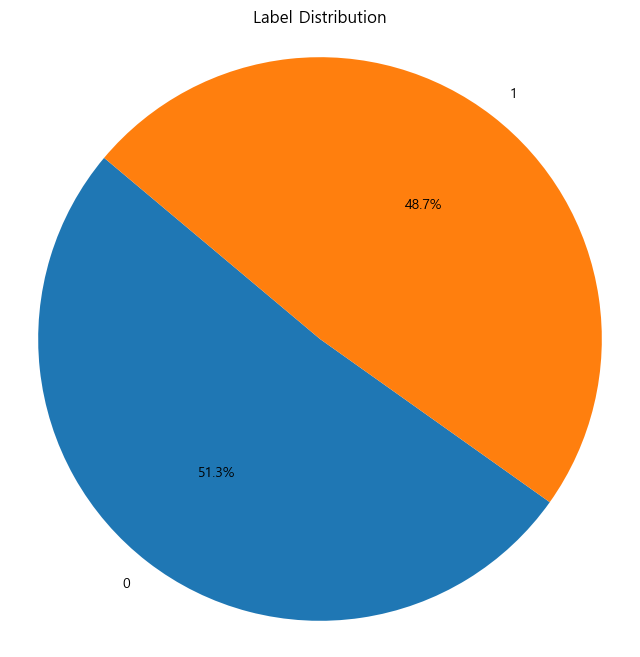

In [63]:
# 라벨링 분포 계산
label_counts = feature['label'].value_counts()

# 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # 원형 그래프를 원으로 만듭니다.
plt.show()


### Feature Selection

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report


# 데이터 불러오기
# data = pd.read_excel('./datasets/features_except_GDP_r.xlsx', index_col=0)
feature = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/PRE데이터/features_except_GDP2.xlsx') #, index_col=0)
# data.info()
# 날짜 데이터를 datetime 형식으로 변환
feature['날짜'] = pd.to_datetime(feature['날짜'])

# 데이터 확인
feature


,날짜,경상수지,실업률,고용률,WTI유가,건설기성액(십억원),국내설비투자지수,국내소매판매액지수,국내전산업생산지수,달러인덱스,...,미국건설지출,미국취업자수증감(만명),미국생산자물가지수,종합주택매매가격지수,소비자물가지수,소비자심리지수(CCSI),실업급여지급건수(월),전체임금총액(원),3년국채기준금리차,label
0,2013-04-01,-0.252263,0.000000,0.006734,-0.0388,0.040479,-0.015169,0.000000,0.012346,-0.016372,...,-1.571429,0.309859,-0.002571,0.000411,-0.001388,-0.024952,0.061858,-0.0053,0.330303,0
1,2013-05-01,0.906427,0.000000,0.000000,-0.0159,0.010696,0.009479,0.007203,-0.002217,0.020254,...,-2.416667,0.150538,0.000000,0.001778,0.000000,0.024606,-0.047892,-0.0323,-1.174205,0
2,2013-06-01,-0.289690,0.033333,0.001672,0.0499,0.055571,0.030516,0.004768,-0.003333,-0.000896,...,-1.235294,-0.163551,-0.000515,0.000326,-0.001217,0.008646,-0.131500,0.0567,9.628695,0
3,2013-07-01,0.020484,0.032258,0.000000,0.0877,-0.019089,0.041002,0.009490,-0.002230,-0.021855,...,0.250000,-0.318436,0.000516,0.000229,0.002146,-0.002857,0.134213,0.0232,0.116747,0
4,2013-08-01,-0.082603,0.000000,0.000000,0.0249,0.012227,0.020788,-0.010576,0.007821,0.007595,...,-2.200000,0.991803,0.003093,-0.000519,0.003541,0.001910,-0.088000,-0.0366,0.060615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2022-08-01,-3.216346,-0.103448,0.000000,-0.0920,-0.002917,0.069315,0.031369,-0.008050,0.027283,...,10.000000,-0.647826,-0.019616,-0.004939,-0.000920,0.032483,0.051012,-0.0555,-0.201858,1
113,2022-09-01,-1.453728,0.076923,0.000000,-0.1123,-0.015550,-0.038602,-0.028571,-0.001803,0.031464,...,-0.636364,0.049383,0.001579,-0.006241,0.001749,0.029213,-0.051524,0.1034,0.491497,1
114,2022-10-01,-0.590460,0.000000,0.000000,0.0886,0.019838,0.002273,0.014231,-0.006323,-0.005924,...,0.750000,0.415686,0.008492,-0.007546,0.003124,-0.028384,-0.101469,-0.1109,-0.025835,1
115,2022-11-01,-2.736097,-0.035714,0.000000,-0.0690,0.004808,0.019652,-0.031805,0.008182,-0.049569,...,-1.285714,-0.285319,-0.004429,-0.013171,-0.000824,-0.026966,-0.012797,-0.0128,-0.386871,1


In [76]:
# 최종피쳐 엑셀파일
# feature.drop([ '실업률','달러인덱스','미국건설지출','국내전산업생산지수',
#                   '3년국채기준금리차','미국PMI(제조업구매담장자지수)'], axis=1).to_excel("filtered_features.xlsx", index=False)

In [75]:
feature.to_excel("filtered_features.xlsx", index=False)

In [93]:
# 타겟 변수와 피처 분리
X = feature.drop([ '실업률','달러인덱스','미국건설지출','국내전산업생산지수',
                  '3년국채기준금리차','미국PMI(제조업구매담장자지수)'], axis=1)

# 날짜 기준으로 데이터 분할
train_data = X[X['날짜'] <= pd.Timestamp('2019-12-31')]
test_data = X[X['날짜'] >= pd.Timestamp('2020-01-01')]

train_data

# 타겟 변수와 피처 분리

X_train = train_data.drop(['날짜', 'label'], axis=1)

y_train = train_data['label']

X_test = test_data.drop(['날짜', 'label'], axis=1)
y_test = test_data['label']
len(y_test) , len(y_train)
X_train

,경상수지,고용률,WTI유가,건설기성액(십억원),국내설비투자지수,국내소매판매액지수,미국ISM(제조업물가지수),미국취업자수증감(만명),미국생산자물가지수,종합주택매매가격지수,소비자물가지수,소비자심리지수(CCSI),실업급여지급건수(월),전체임금총액(원)
0,-0.252263,0.006734,-0.0388,0.040479,-0.015169,0.000000,0.049123,0.309859,-0.002571,0.000411,-0.001388,-0.024952,0.061858,-0.0053
1,0.906427,0.000000,-0.0159,0.010696,0.009479,0.007203,-0.113712,0.150538,0.000000,0.001778,0.000000,0.024606,-0.047892,-0.0323
2,-0.289690,0.001672,0.0499,0.055571,0.030516,0.004768,-0.064151,-0.163551,-0.000515,0.000326,-0.001217,0.008646,-0.131500,0.0567
3,0.020484,0.000000,0.0877,-0.019089,0.041002,0.009490,0.018145,-0.318436,0.000516,0.000229,0.002146,-0.002857,0.134213,0.0232
4,-0.082603,0.000000,0.0249,0.012227,0.020788,-0.010576,0.073267,0.991803,0.003093,-0.000519,0.003541,0.001910,-0.088000,-0.0366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.283692,0.003289,-0.0594,0.008400,0.014231,0.037602,-0.064151,1.455556,-0.005570,-0.001615,0.002400,-0.036082,-0.077957,-0.0314
77,0.608167,0.000000,-0.0187,-0.019105,0.000935,-0.025465,-0.076613,-0.081448,-0.002546,-0.000290,0.003711,0.048128,-0.071522,0.1100
78,0.002683,0.003279,0.0020,0.005249,0.009346,0.003015,0.058952,-0.507389,0.003573,0.000870,0.002475,0.017347,0.025963,-0.1128
79,-0.268698,0.000000,0.0183,-0.023243,-0.016667,0.031062,0.028866,1.080000,-0.000509,0.001460,-0.005598,0.023069,-0.112287,-0.0309


In [47]:
# X_train['날짜'] = pd.to_numeric(X_train['날짜'])

In [94]:
X_train

,경상수지,고용률,WTI유가,건설기성액(십억원),국내설비투자지수,국내소매판매액지수,미국ISM(제조업물가지수),미국취업자수증감(만명),미국생산자물가지수,종합주택매매가격지수,소비자물가지수,소비자심리지수(CCSI),실업급여지급건수(월),전체임금총액(원)
0,-0.252263,0.006734,-0.0388,0.040479,-0.015169,0.000000,0.049123,0.309859,-0.002571,0.000411,-0.001388,-0.024952,0.061858,-0.0053
1,0.906427,0.000000,-0.0159,0.010696,0.009479,0.007203,-0.113712,0.150538,0.000000,0.001778,0.000000,0.024606,-0.047892,-0.0323
2,-0.289690,0.001672,0.0499,0.055571,0.030516,0.004768,-0.064151,-0.163551,-0.000515,0.000326,-0.001217,0.008646,-0.131500,0.0567
3,0.020484,0.000000,0.0877,-0.019089,0.041002,0.009490,0.018145,-0.318436,0.000516,0.000229,0.002146,-0.002857,0.134213,0.0232
4,-0.082603,0.000000,0.0249,0.012227,0.020788,-0.010576,0.073267,0.991803,0.003093,-0.000519,0.003541,0.001910,-0.088000,-0.0366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.283692,0.003289,-0.0594,0.008400,0.014231,0.037602,-0.064151,1.455556,-0.005570,-0.001615,0.002400,-0.036082,-0.077957,-0.0314
77,0.608167,0.000000,-0.0187,-0.019105,0.000935,-0.025465,-0.076613,-0.081448,-0.002546,-0.000290,0.003711,0.048128,-0.071522,0.1100
78,0.002683,0.003279,0.0020,0.005249,0.009346,0.003015,0.058952,-0.507389,0.003573,0.000870,0.002475,0.017347,0.025963,-0.1128
79,-0.268698,0.000000,0.0183,-0.023243,-0.016667,0.031062,0.028866,1.080000,-0.000509,0.001460,-0.005598,0.023069,-0.112287,-0.0309


In [44]:
len(X_test)

24

In [73]:
# # 타겟 변수와 피처 분리
# X = feature.drop(['날짜', 'label'], axis=1)
# y = feature['label']

# # 날짜 기준으로 데이터 분할
# train_data = feature[feature['날짜'] <= pd.Timestamp('2020-12-31')]
# test_data = feature[feature['날짜'] >= pd.Timestamp('2021-01-01')]


# # 타겟 변수와 피처 분리
# X_train = train_data.drop(['날짜', 'label'], axis=1)
# y_train = train_data['label']
# X_test = test_data.drop(['날짜', 'label'], axis=1)
# y_test = test_data['label']


# from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
# from sklearn.model_selection import StratifiedKFold
# import pandas as pd


# s_fold = StratifiedKFold(n_splits=3)
# acc_train_list = []
# acc_test_list = []

# ex = s_fold.split(X, y) #label의 class 별 동일한 분포로 나눈다.
# type(ex)
# for train_index, test_index in s_fold.split(X, y):
    
#     X_train, y_train = X.loc[train_index], y.loc[train_index]
#     X_test, y_test = X.loc[test_index], y.loc[test_index]

#     # 모델생성
#     tree = DecisionTreeClassifier(random_state=42)
#     # 학습
#     tree.fit(X_train, y_train)
#     # 검증
#     pred_train = tree.predict(X_train)
#     pred_test = tree.predict(X_test)
#     acc_train = accuracy_score(y_train, pred_train)
#     acc_test = accuracy_score(y_test, pred_test)

#     acc_train_list.append(acc_train)
#     acc_test_list.append(acc_test)

# acc_train_list, np.mean(acc_train_list)
# #==> [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# acc_test_list, np.mean(acc_test_list)

([0.358974358974359, 0.5641025641025641, 0.48717948717948717],
 0.47008547008547014)

In [74]:
# acc_train_list

[1.0, 1.0, 1.0]

In [75]:
# acc_test_list

[0.358974358974359, 0.5641025641025641, 0.48717948717948717]

In [95]:
# s_fold = StratifiedKFold(n_splits=3)
# acc_train_list = []
# acc_test_list = []

# for train_index, test_index in s_fold.split(X_train, y_train):
    
#     X, y = X_train.loc[train_index], y_train.loc[train_index]
#     X_validation_set, y_validation_test = X_train.loc[test_index], y_train.loc[test_index]

# 모델 생성
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=0)

# 모델 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = tree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgb = lgb.predict(X_test)
y_pred_cat = cat.predict(X_test)

# 정확도 계산 및 기록
# acc_train = accuracy_score(y_train, tree.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

acc_test_list.append(acc_test)

# # 평균 정확도 출력
# print("평균 훈련 정확도:", np.mean(acc_train_list))
# print("평균 테스트 정확도:", np.mean(acc_test_list))

# # DecisionTreeClassifier 성능 평가
# print("DecisionTreeClassifier 성능:")
# print("정확도:", np.mean(acc_test_list))
# print("정밀도:", precision_score(y_test, y_pred, average='macro'))
# print("재현율:", recall_score(y_test, y_pred, average='macro'))
# print("F1 점수:", f1_score(y_test, y_pred, average='macro'))
# print(classification_report(y_test, y_pred))

# # 피처 중요도 출력
# feature_importances_dt = pd.DataFrame(tree.feature_importances_,
#                                       index=X_train.columns,
#                                       columns=['importance']).sort_values('importance', ascending=False)

# feature_importances_dt.reset_index(inplace=True)
# feature_importances_dt.columns = ['feature', 'importance']
# feature_importances_dt

[LightGBM] [Info] Number of positive: 38, number of negative: 43
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469136 -> initscore=-0.123614
[LightGBM] [Info] Start training from score -0.123614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

1. 기본 성능 검증

In [ ]:
# # 날짜 기준으로 데이터 분할
# train_data = feature[feature['날짜'] <= pd.Timestamp('2020-12-31')]
# test_data = feature[feature['날짜'] >= pd.Timestamp('2021-01-01')]


# # 타겟 변수와 피처 분리
# X_train = train_data.drop(['날짜', 'label'], axis=1)
# y_train = train_data['label']
# X_test = test_data.drop(['날짜', 'label'], axis=1)
# y_test = test_data['label']


### 모델들 초기화
# dt = DecisionTreeClassifier(random_state=42)
# rf = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)
# lgb = LGBMClassifier(random_state=42)
# cat = CatBoostClassifier(random_state=42, verbose=0)

# ### 모델 학습
# dt.fit(X_train, y_train)
# rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)
# lgb.fit(X_train, y_train)
# cat.fit(X_train, y_train)

# ### 모델 예측
# y_pred_dt = dt.predict(X_test)
# y_pred_rf = rf.predict(X_test)
# y_pred_xgb = xgb.predict(X_test)
# y_pred_lgb = lgb.predict(X_test)
# y_pred_cat = cat.predict(X_test)

(1) DecisionTreeClassifier

In [61]:
# # 평균 정확도 출력
# print("평균 훈련 정확도:", np.mean(acc_train_list))
# print("평균 테스트 정확도:", np.mean(acc_test_list))

# # DecisionTreeClassifier 성능 평가
# print("DecisionTreeClassifier 성능:")
# print("정확도:", np.mean(acc_test_list))
# print("정밀도:", precision_score(y_test, y_pred, average='macro'))
# print("재현율:", recall_score(y_test, y_pred, average='macro'))
# print("F1 점수:", f1_score(y_test, y_pred, average='macro'))
# print(classification_report(y_test, y_pred))

# # 피처 중요도 출력
# feature_importances_dt = pd.DataFrame(tree.feature_importances_,
#                                       index=X_train.columns,
#                                       columns=['importance']).sort_values('importance', ascending=False)

# feature_importances_dt.reset_index(inplace=True)
# feature_importances_dt.columns = ['feature', 'importance']
# feature_importances_dt

DecisionTreeClassifier 성능:
정확도: 0.4532930107526882
정밀도: 0.5071428571428571
재현율: 0.5105263157894737
F1 점수: 0.4337568058076225
              precision    recall  f1-score   support

           0       0.21      0.60      0.32         5
           1       0.80      0.42      0.55        19

    accuracy                           0.46        24
   macro avg       0.51      0.51      0.43        24
weighted avg       0.68      0.46      0.50        24



,feature,importance
0,종합주택매매가격지수,0.390593
1,미국취업자수증감(만명),0.241139
2,건설기성액(십억원),0.141063
3,소비자물가지수,0.078798
4,WTI유가,0.049909
5,미국생산자물가지수,0.041531
6,고용률,0.038141
7,미국ISM(제조업물가지수),0.018826
8,경상수지,0.000000
9,국내설비투자지수,0.000000


평균 훈련 정확도: 1.0
이는 각 fold에서 훈련 데이터에 대한 모델의 정확도를 평가한 후 이를 평균한 값입니다. 평균 훈련 정확도가 1.0이라는 것은 모든 fold에서 훈련 데이터에 대해 모델이 완벽하게 fit되어서 모든 훈련 데이터에 대해 100% 정확도를 달성했다는 것을 의미합니다.
평균 테스트 정확도: 0.47008547008547014
이는 각 fold에서 테스트 데이터에 대한 모델의 정확도를 평가한 후 이를 평균한 값입니다. 평균 테스트 정확도가 0.47이라는 것은 모델이 테스트 데이터에 대해 약 47%의 정확도를 달성했다는 것을 의미합니다.
DecisionTreeClassifier 성능:
정확도: 0.47008547008547014
테스트 데이터에 대한 모델의 정확도는 약 47%입니다.
정밀도: 0.4907407407407407
모델이 긍정 클래스로 예측한 것 중 실제로 긍정 클래스인 비율은 약 49%입니다.
재현율: 0.4921052631578947
실제 긍정 클래스 중 모델이 정확하게 긍정 클래스로 분류한 비율은 약 49%입니다.
F1 점수: 0.4701086956521739
정밀도와 재현율의 조화 평균인 F1 점수는 약 47%입니다.
이 결과를 종합해보면, 이 결정 트리 모델은 훈련 데이터에 대해서는 완벽하게 fit되었지만, 테스트 데이터에 대해서는 성능이 낮아 일반화되지 않았음을 나타냅니다. 이 모델은 과적합되었을 가능성이 있으며, 추가적인 모델 튜닝이나 다른 모델의 사용이 필요할 것으로 보입니다.

In [96]:
print("DecisionTreeClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred, average='macro'):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred, average='macro'):.2f}")
print(classification_report(y_test, y_pred))
feature_importances_dt = pd.DataFrame(tree.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dt.reset_index(inplace=True)
feature_importances_dt.columns = ['feature', 'importance']
feature_importances_dt

DecisionTreeClassifier 성능:
정확도: 0.67
정밀도: 0.67
재현율: 0.66
F1 점수: 0.66
ROC AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.67      0.74      0.70        19

    accuracy                           0.67        36
   macro avg       0.67      0.66      0.66        36
weighted avg       0.67      0.67      0.66        36



,feature,importance
0,종합주택매매가격지수,0.246445
1,전체임금총액(원),0.139696
2,소비자물가지수,0.131742
3,경상수지,0.119185
4,미국취업자수증감(만명),0.078764
5,국내설비투자지수,0.063365
6,실업급여지급건수(월),0.060312
7,건설기성액(십억원),0.055797
8,미국생산자물가지수,0.044064
9,소비자심리지수(CCSI),0.039657


(2) RandomForestClassifier

In [98]:
print("RandomForestClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred, average='macro'):.2f}")
print(classification_report(y_test, y_pred_rf))
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rf.reset_index(inplace=True)
feature_importances_rf.columns = ['feature', 'importance']
feature_importances_rf

RandomForestClassifier 성능:
정확도: 0.61
정밀도: 0.63
재현율: 0.60
F1 점수: 0.58
ROC AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.67      0.35      0.46        17
           1       0.59      0.84      0.70        19

    accuracy                           0.61        36
   macro avg       0.63      0.60      0.58        36
weighted avg       0.63      0.61      0.59        36



,feature,importance
0,종합주택매매가격지수,0.155332
1,WTI유가,0.080247
2,소비자물가지수,0.073432
3,소비자심리지수(CCSI),0.069716
4,건설기성액(십억원),0.069368
5,국내설비투자지수,0.067862
6,경상수지,0.067105
7,미국생산자물가지수,0.065162
8,미국취업자수증감(만명),0.064074
9,실업급여지급건수(월),0.062154


(3) XGBClassifier

In [99]:
print("XGBClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred, average='macro'):.2f}")
print(classification_report(y_test, y_pred_xgb))
feature_importances_xgb = pd.DataFrame(xgb.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
feature_importances_xgb.reset_index(inplace=True)
feature_importances_xgb.columns = ['feature', 'importance']
feature_importances_xgb

XGBClassifier 성능:
정확도: 0.67
정밀도: 0.67
재현율: 0.66
F1 점수: 0.66
ROC AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.65      0.79      0.71        19

    accuracy                           0.67        36
   macro avg       0.67      0.66      0.66        36
weighted avg       0.67      0.67      0.66        36



,feature,importance
0,종합주택매매가격지수,0.174608
1,국내소매판매액지수,0.125361
2,국내설비투자지수,0.088040
3,미국생산자물가지수,0.087605
4,미국취업자수증감(만명),0.085369
5,건설기성액(십억원),0.078844
6,고용률,0.071948
7,WTI유가,0.059022
8,미국ISM(제조업물가지수),0.048879
9,소비자심리지수(CCSI),0.048630


(4) LGBMClassifier

In [100]:
y_pred_rf = lgb.predict(X_test)
print("LGBMClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_lgb):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred, average='macro'):.2f}")
print(classification_report(y_test, y_pred_lgb))
feature_importances_lgb = pd.DataFrame(lgb.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances_lgb)

LGBMClassifier 성능:
정확도: 0.64
정밀도: 0.64
재현율: 0.64
F1 점수: 0.64
ROC AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        17
           1       0.65      0.68      0.67        19

    accuracy                           0.64        36
   macro avg       0.64      0.64      0.64        36
weighted avg       0.64      0.64      0.64        36



,importance
건설기성액(십억원),33
종합주택매매가격지수,31
국내설비투자지수,26
미국생산자물가지수,22
미국취업자수증감(만명),17
소비자물가지수,17
고용률,15
경상수지,12
WTI유가,11
국내소매판매액지수,11


(5) CatBoostClassifier

In [101]:
print("CatBoostClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_cat):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred, average='macro'):.2f}")
print(classification_report(y_test, y_pred_cat))
feature_importances_cat = pd.DataFrame(cat.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances_cat)

CatBoostClassifier 성능:
정확도: 0.67
정밀도: 0.67
재현율: 0.67
F1 점수: 0.67
ROC AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.68      0.68      0.68        19

    accuracy                           0.67        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.67      0.67      0.67        36



,importance
종합주택매매가격지수,16.483888
건설기성액(십억원),10.579662
국내설비투자지수,7.872411
경상수지,7.652620
WTI유가,6.812885
전체임금총액(원),6.439330
미국생산자물가지수,6.323842
미국취업자수증감(만명),6.297870
고용률,6.026467
국내소매판매액지수,5.781761


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (16,) and arg 1 with shape (14,).

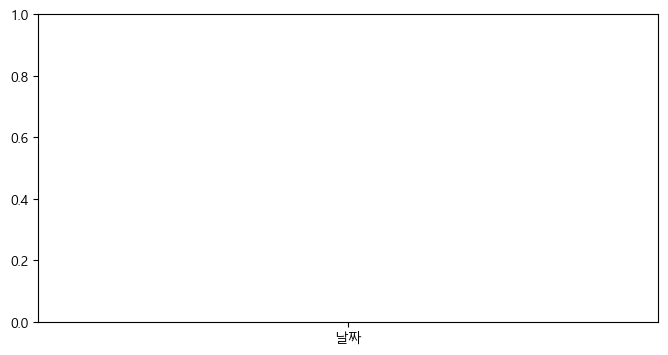

In [102]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

low_importance_criteria = 2 
ylimit_val = 19

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, cat.feature_importances_, color='skyblue')
ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')

ax.set_xticks(range(len(X.columns)))  # X축에 대한 틱 위치 설정
ax.set_xticklabels(X.columns, rotation=45, ha="right")  # X축에 대한 레이블 설정
ax.set_xlabel("Feature")  # X축 레이블
ax.set_ylabel("Feature Importance")  # Y축 레이블
ax.set_ylim(0, ylimit_val)  # Y축 범위
ax.set_title("Feature Importance in Linear Regression Model")  # 그래프 제목 설정

#### 학습데이터의 성능을 평가하는 이유
- 모델을 학습할 때 학습 데이터의 성능도 평가할 수 있습니다. 이를 통해 모델이 학습 데이터에 과적합(overfitting)되었는지 여부를 확인할 수 있습니다. 학습 데이터에 대한 성능 평가는 모델이 학습 데이터에 대해 얼마나 잘 예측하는지를 확인하는 데 도움이 됩니다.

일반적으로 모델의 성능을 평가할 때는 학습 데이터와 별도의 테스트 데이터를 사용합니다. 그러나 경우에 따라 학습 데이터에서의 성능도 중요한 지표가 될 수 있습니다. 예를 들어, 학습 데이터에서의 성능이 낮을 경우 모델이 학습 데이터에 과소적합(underfitting)되었을 가능성이 있습니다. 반면에 학습 데이터에서의 성능이 매우 높을 경우 모델이 학습 데이터에 과적합되었을 가능성이 있습니다.

따라서 모델을 학습할 때는 학습 데이터와 함께 학습 데이터의 성능도 평가하는 것이 좋습니다. 이를 통해 모델의 학습 과정을 모니터링하고 적절한 조치를 취할 수 있습니다. 하지만 모델의 최종 성능을 평가할 때는 학습 데이터와 별도의 테스트 데이터를 사용하는 것이 좋습니다.

- 모델을 학습할 때 학습 데이터의 성능을 평가하려면 일반적으로 교차 검증(cross-validation)을 사용합니다. 교차 검증은 데이터를 여러 개의 fold로 나누고, 각 fold를 사용하여 모델을 학습하고 나머지 fold를 사용하여 성능을 평가하는 과정을 반복하는 방법입니다. 이를 통해 모델의 일반화 성능을 더 정확하게 추정할 수 있습니다.

#### 모델링

### Feature Selection
1. Reculsive Feature Elimination
2. Select From model - random forest
3. Select from model - LogisticRegression
4. Permutation Importance

1. Reculsive Feature Elimination
- 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 반복